In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import csv
import images2gif as ig
from scipy.interpolate import interp1d
from scipy.ndimage.interpolation import rotate
import matplotlib.gridspec as gridspec

In [2]:
cd "~\Google Drive\MAGPIE\data\2016\s0125_16 C RECONNECTION 12 FRAME\s0125_16 12 frame"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0125_16 C RECONNECTION 12 FRAME\s0125_16 12 frame


In [3]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
b=[]
s=[]
for i in range(1,13):
    if i<10:
        st="0"+str(i)
    else:
        st=str(i)

    bk_fn=shot+" Background_0"+st+".png"
    bk_im=plt.imread(bk_fn) #read background image
    #bk_im=np.asarray(np.sum(bk_im,2), dtype=float)
    b.append(bk_im)#np.asarray(np.sum(bk_im,2), dtype=float)) #convert to grrayscale
    sh_fn=shot+" Shot_0"+st+".png" 
    sh_im=plt.imread(sh_fn)
    s.append(sh_im)

bb=np.zeros((13, b[0].shape[0], b[0].shape[1])) #create an empty array to store the results
ss=np.zeros((13, s[0].shape[0], s[0].shape[1]))
bb[0]=b[0]
ss[0]=s[0]
shifts=np.zeros((13,2))

In [4]:
#normalise data to intensity of background images
norms=[b_im[100:-100,100:-100].sum() for b_im in b]
n_max=max(norms)
nn=[n/n_max for n in norms]
s_n=[s_im[100:-100,100:-100]/n for s_im, n in zip(s, nn)]

In [5]:
#normalise data to maximum intensity in any one frame?
#s_max=max([s_im.max() for s_im in s_n])
#s_nn=[s_im/s_max for s_im in s_n]

In [15]:
#logarithm of data
s_l=[np.log(s_im) for s_im in s_n]
lv_min=-4
lv_max=0.2
s_nl=[(np.clip(s_im, a_min=lv_min, a_max=lv_max)-lv_min)/(lv_max-lv_min) for s_im in s_l]

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [16]:
#rotate
#dx=287-572
#dy=115-531
#theta=180/np.pi*np.arctan(dx/dy)
s_r=[rotate(s_im, 24.5)for s_im in s_nl]

In [52]:
x0=550
y0=620
s_c=[s_im[y0-400:y0+400,x0-300:x0+300] for s_im in s_r]

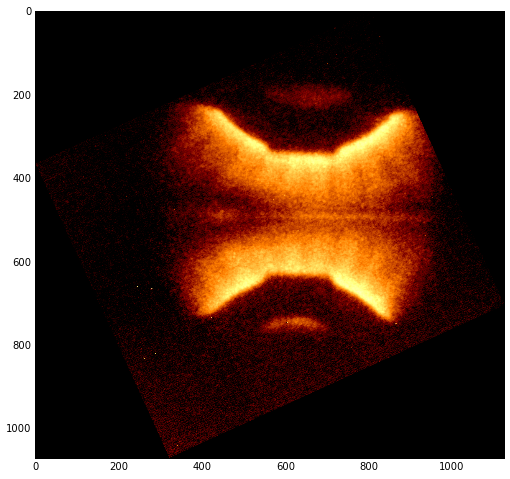

In [17]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(s_r[11], cmap='afmhot', clim=[0,1])

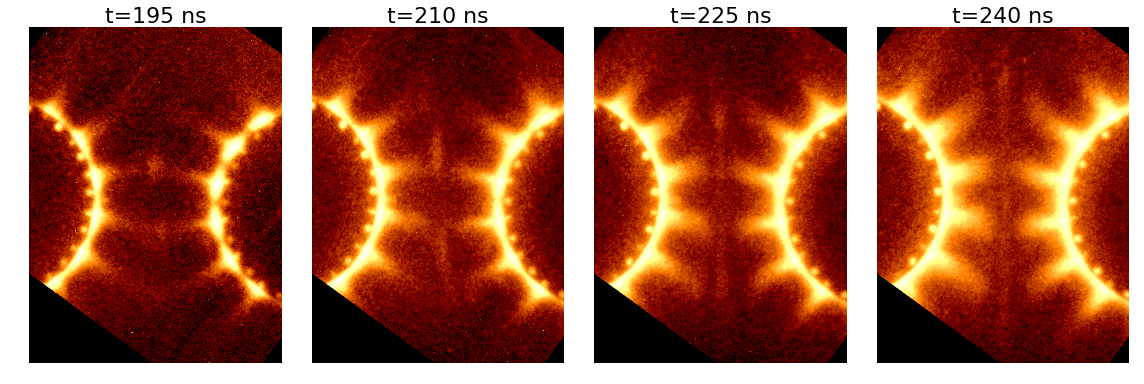

In [69]:
fig, ax=plt.subplots(1,4, figsize=(16,8))
for ain, a in enumerate(ax):
    a.imshow(s_c[ain+1], cmap='afmhot', clim=[0,1])
    a.axis('off')
    a.set_title('t='+str(ain*15+195)+' ns', fontsize=22)
fig.tight_layout(w_pad=0)



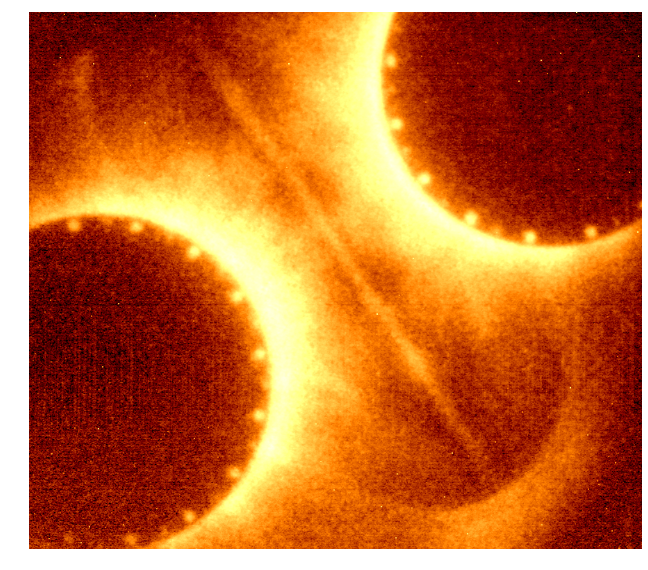

In [65]:
fig, ax=plt.subplots(figsize=(12,8))
hot_im=[]
for im in s_nl:
    ax.imshow(im, cmap='afmhot', clim=[0,1])
    plt.axis('off')
    fig.tight_layout()
    fig.canvas.draw()
    w,h=fig.canvas.get_width_height()
    buf=np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8)
    buf.shape=(h,w,3)
    hot_im.append(buf)

In [66]:
shfn=shot+" Shot"
ig.writeGif(shfn+'.gif',hot_im, duration=0.2)

In [22]:
in_lv=[0, 0.1, 0.5, 1.0]
out_lv=[0, 0.8, 1.0, 1.0]
f=interp1d(in_lv, out_lv, kind='linear')
s_c=[f(s_im) for s_im in s_nn]

In [14]:
shfn=shot+" Shot_c"
ig.writeGif(shfn+'.gif',, duration=0.5)

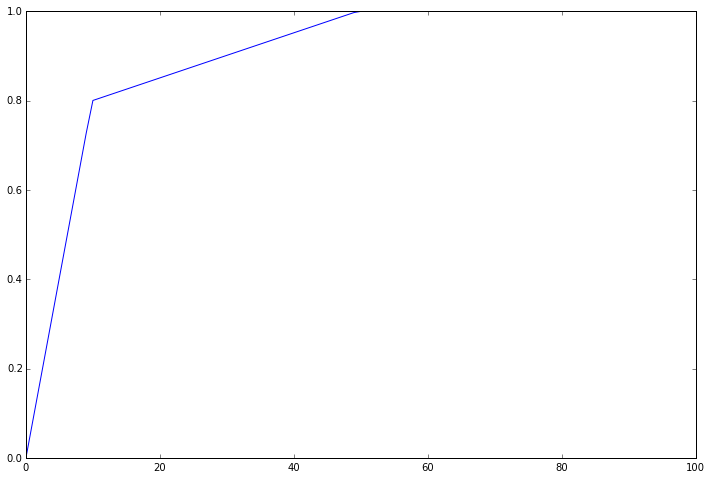

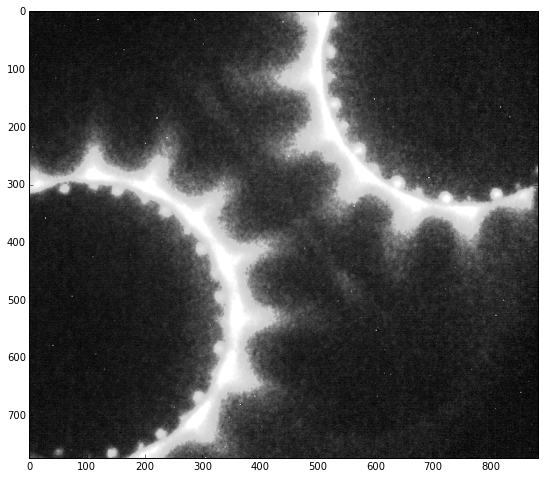

In [23]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(f(np.linspace(0,1.0,100)))
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(f(s_nn[3]), cmap='gray', clim=[0,1])

In [12]:
26/255

0.10196078431372549

# New Code

In [21]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
s=[]


for i in range(1,13):
    if i<10:
        st="0"+str(i)
    else:
        st=str(i)
    sh_fn=shot+" Shot_0"+st+".png" 
    sh_im=plt.imread(sh_fn)
    s.append(sh_im)
    

shfn=shot+" Shot"
ig.writeGif(shfn+'.gif',s, duration=0.2)